In [164]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [165]:
# Study data files
data_file1 = "Resources/Table 43a.xlsx"

In [166]:
# ******We don't need Sheet to read as we have already manually delete other sheets*******
#data_file1_df = pd.read_excel(open(data_file1, 'rb'), sheet_name= "Sheet1")

## Read the Full-time Equivalent Students, 2006-2020  data file
data_file1_df = pd.read_excel(data_file1)

# Display the data table for preview
data_file1_df.head(10)

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,a Pre-Year 1 (Foundation Year),3102.0,33669.0,36771.0
1,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,b Year 1,3153.0,33636.0,36789.0
2,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,c Year 2,3106.0,34483.0,37589.0
3,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,d Year 3,2969.0,33682.0,36651.0
4,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,e Year 4,2834.0,33465.0,36299.0
5,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,f Year 5,2769.0,32509.0,35278.0
6,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,g Year 6,2826.0,32077.0,34903.0
7,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,i Ungraded primary,240.0,1445.0,1685.0
8,2020,a NSW,a Government,a Government,a Full-time,a Male,b Secondary School,b Junior Secondary School,j Year 7 secondary,2877.0,27715.0,30592.0
9,2020,a NSW,a Government,a Government,a Full-time,a Male,b Secondary School,b Junior Secondary School,k Year 8,2706.0,27316.0,30022.0


In [167]:
# Identify incomplete rows, As in the result there are no empty rows,therefore we do not drop any rows.
data_file1_df.count()

Year                                                   14143
State/Territory                                        14143
Affiliation (Gov/Non-gov)                              14143
Affiliation (Gov/Cath/Ind)                             14143
FT/PT                                                  14143
Sex                                                    14143
School Level                                           14143
National Report on Schooling (ANR) School Level        14143
Year (Grade)                                           14143
FTE Aboriginal and Torres Strait Islander Students     14143
FTE Non-Indigenous Students                            14143
FTE All Students                                       14143
dtype: int64

In [168]:
data_file1_df.columns

Index(['Year', 'State/Territory', 'Affiliation (Gov/Non-gov)',
       'Affiliation (Gov/Cath/Ind)', 'FT/PT', 'Sex', 'School Level',
       'National Report on Schooling (ANR) School Level', 'Year (Grade)',
       'FTE Aboriginal and Torres Strait Islander Students ',
       'FTE Non-Indigenous Students ', 'FTE All Students '],
      dtype='object')

In [169]:
def func(x):
    print(x)
    if type(x) == float:
        x = ' '
    return x.split(' ')[-1]

In [170]:
#data_file1_df['State/Territory'] = data_file1_df['State/Territory'].apply(lambda x: func(x))

In [171]:
split_columns_data_file1_df = ["State/Territory","Affiliation (Gov/Non-gov)", "Affiliation (Gov/Cath/Ind)", "FT/PT", "Sex", "School Level","National Report on Schooling (ANR) School Level","Year (Grade)"]
for column in split_columns_data_file1_df:
    data_file1_df[column] = data_file1_df[column].apply(lambda x: func(x))




a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b 

e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
g NT
g NT
g NT
g NT
g NT
g NT

c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA

h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NS

e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas

b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Gove

a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b 

b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-governme

a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-gove

b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Governm

b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government


c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic

a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b C

a Full-time
a Full-time
b Part-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
b Part-time
b Part-time
b Part-time
b Part-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Fu

a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
b Part-time
b Part-time
b Part-time
a Full-time
a Fu

b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
a Full-time
a Full-time
a Fu

a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Fu

b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
a Male
a Male
a Mal

b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a 

b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Femal

b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male


a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Prima

b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary Schoo

b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary S

b Secondary School
b Secondary School
a Primary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School


c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a 

b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b 

a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary Sc

b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
c Se

a Primary School
b Junior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
c Senior Secondary School
a Primary School
a Primary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Sec

e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
d Year 3
e Year 4
g Year 6
k Year 8
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
c Year 2
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10


e Year 4
g Year 6
h Year 7 primary
i Ungraded primary
k Year 8
m Year 10
p Ungraded secondary
n Year 11
o Year 12
c Year 2
h Year 7 primary
i Ungraded primary
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
h Year 7 primary
i Ungraded primary
k Year 8
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
h Year 7 primary
i Ungraded primary
k Year 8
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
g Year 6
h Year 7 primary
k Year 8
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
d Year 3
h Year 7 primary
k Year 8
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
h Year 7 primary
i Ungraded primary
k Year 8
l Year 9
m Year 10
p Ungraded secondary
n

c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
n Year 11
m Year 10
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
c Year 2
n Year 11
a Pre-Year 1 (Foundation Year)
l Year 9
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
l Year 9
a Pre-Year 1 (Foundation Year)

e Year 4
f Year 5
g Year 6
h Year 7 primary
i Ungraded primary
k Year 8
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
c Year 2
i Ungraded primary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
k Year 8
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
h Year 7 primary
k Year 8
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
h Year 7 primary
k Year 8
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
h Year 7 primary
k Year 8
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
h Year 7 primary
k Year 8
l Year 9
m Year 10
p Ungraded seconda

In [172]:
#data_file1_df
data_file1_df

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,NSW,Government,Government,Full-time,Male,School,School,Year),3102.0,33669.0,36771.0
1,2020,NSW,Government,Government,Full-time,Male,School,School,1,3153.0,33636.0,36789.0
2,2020,NSW,Government,Government,Full-time,Male,School,School,2,3106.0,34483.0,37589.0
3,2020,NSW,Government,Government,Full-time,Male,School,School,3,2969.0,33682.0,36651.0
4,2020,NSW,Government,Government,Full-time,Male,School,School,4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14138,2006,ACT,Non-government,Independent,Full-time,Female,School,School,12,0.0,253.0,253.0
14139,2006,ACT,Non-government,Independent,Part-time,Male,School,School,Year),0.0,30.5,30.5
14140,2006,ACT,Non-government,Independent,Part-time,Male,School,School,secondary,0.0,3.2,3.2
14141,2006,ACT,Non-government,Independent,Part-time,Female,School,School,Year),0.0,34.2,34.2


In [173]:
# Display a statistical overview of the DataFrame
data_file1_df.describe()

,Year,FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
count,14143.000000,14143.000000,14143.00000,14143.000000
mean,2012.959202,197.264852,3680.44878,3877.713632
std,4.296281,447.751865,6268.03617,6637.495635
min,2006.000000,0.000000,0.00000,0.100000
25%,2009.000000,1.400000,25.00000,28.800000
50%,2013.000000,28.000000,708.00000,955.000000
75%,2017.000000,148.000000,5000.00000,5140.500000
max,2020.000000,3153.000000,34490.00000,37589.000000


In [174]:
#Verify the column types
data_file1_df.dtypes

Year                                                     int64
State/Territory                                         object
Affiliation (Gov/Non-gov)                               object
Affiliation (Gov/Cath/Ind)                              object
FT/PT                                                   object
Sex                                                     object
School Level                                            object
National Report on Schooling (ANR) School Level         object
Year (Grade)                                            object
FTE Aboriginal and Torres Strait Islander Students     float64
FTE Non-Indigenous Students                            float64
FTE All Students                                       float64
dtype: object

In [175]:
# Converting the "Year" column's values to String
converted_data_file1_df = data_file1_df.copy()
converted_data_file1_df["Year"] = converted_data_file1_df.loc[:, "Year"].astype(str)

In [178]:
converted_data_file1_df

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,NSW,Government,Government,Full-time,Male,School,School,Year),3102.0,33669.0,36771.0
1,2020,NSW,Government,Government,Full-time,Male,School,School,1,3153.0,33636.0,36789.0
2,2020,NSW,Government,Government,Full-time,Male,School,School,2,3106.0,34483.0,37589.0
3,2020,NSW,Government,Government,Full-time,Male,School,School,3,2969.0,33682.0,36651.0
4,2020,NSW,Government,Government,Full-time,Male,School,School,4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14138,2006,ACT,Non-government,Independent,Full-time,Female,School,School,12,0.0,253.0,253.0
14139,2006,ACT,Non-government,Independent,Part-time,Male,School,School,Year),0.0,30.5,30.5
14140,2006,ACT,Non-government,Independent,Part-time,Male,School,School,secondary,0.0,3.2,3.2
14141,2006,ACT,Non-government,Independent,Part-time,Female,School,School,Year),0.0,34.2,34.2


In [179]:
#double checking the Year type after conversion
converted_data_file1_df.dtypes

Year                                                    object
State/Territory                                         object
Affiliation (Gov/Non-gov)                               object
Affiliation (Gov/Cath/Ind)                              object
FT/PT                                                   object
Sex                                                     object
School Level                                            object
National Report on Schooling (ANR) School Level         object
Year (Grade)                                            object
FTE Aboriginal and Torres Strait Islander Students     float64
FTE Non-Indigenous Students                            float64
FTE All Students                                       float64
dtype: object

In [186]:
#Filter the data to get last five year data
Last_five_years_data_df = converted_data_file1_df.loc[(converted_data_file1_df["Year"] == "2016") |(converted_data_file1_df["Year"] == "2017") | (converted_data_file1_df["Year"] == "2018") | (converted_data_file1_df["Year"] == "2019") | (converted_data_file1_df["Year"] == "2020")]
Last_five_years_data_df

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,NSW,Government,Government,Full-time,Male,School,School,Year),3102.0,33669.0,36771.0
1,2020,NSW,Government,Government,Full-time,Male,School,School,1,3153.0,33636.0,36789.0
2,2020,NSW,Government,Government,Full-time,Male,School,School,2,3106.0,34483.0,37589.0
3,2020,NSW,Government,Government,Full-time,Male,School,School,3,2969.0,33682.0,36651.0
4,2020,NSW,Government,Government,Full-time,Male,School,School,4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4610,2016,ACT,Non-government,Independent,Full-time,Female,School,School,12,4.0,354.0,358.0
4611,2016,ACT,Non-government,Independent,Part-time,Male,School,School,Year),0.0,2.2,2.2
4612,2016,ACT,Non-government,Independent,Part-time,Male,School,School,3,0.0,2.1,2.1
4613,2016,ACT,Non-government,Independent,Part-time,Male,School,School,6,0.0,2.4,2.4


19460817.1

In [194]:
# Using GroupBy in order to separate the data into fields according to "state" values
Group_by_last_five_years = Last_five_years_data_df.groupby(['State/Territory'])
Group_by_last_five_years.count()


,Year,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
State/Territory,,,,,,,,,,,
ACT,459,459,459,459,459,459,459,459,459,459,459
NSW,550,550,550,550,550,550,550,550,550,550,550
NT,521,521,521,521,521,521,521,521,521,521,521
Qld,660,660,660,660,660,660,660,660,660,660,660
SA,638,638,638,638,638,638,638,638,638,638,638
Tas.,497,497,497,497,497,497,497,497,497,497,497
Vic.,796,796,796,796,796,796,796,796,796,796,796
WA,494,494,494,494,494,494,494,494,494,494,494


In [196]:
#Find the total number of Enrolements by state for last five years. 
total_Enrolments_by_State= Group_by_last_five_years['FTE All Students '].sum()
total_Enrolments_by_State.reset_index()

,State/Territory,FTE All Students
0,ACT,354313.8
1,NSW,6094245.4
2,NT,204403.0
3,Qld,4115583.8
4,SA,1343161.1
5,Tas.,405733.5
6,Vic.,4851464.7
7,WA,2091911.8


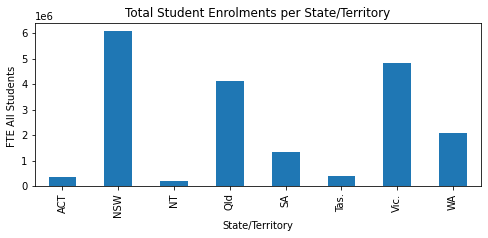

In [197]:
#Display the result in a Bar graph
bar_plot = total_Enrolments_by_State.plot (kind = "bar", figsize=(8,3))
plt.title('Total Student Enrolments per State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('FTE All Students ')
plt.show()


In [206]:
#Results by yearly basis , Year by State by total enrolements for last five years
Group_by_Year_state= Last_five_years_data_df.groupby(['Year','State/Territory'])
Group_by_Year_state
Group_by_Year_state.count()

Affiliation (Gov/Non-gov)  Affiliation (Gov/Cath/Ind)  \
Year State/Territory                                                          
2016 ACT                                     92                          92   
     NSW                                    110                         110   
     NT                                     100                         100   
     Qld                                    135                         135   
     SA                                     127                         127   
     Tas.                                    97                          97   
     Vic.                                   161                         161   
     WA                                     101                         101   
2017 ACT                                     92                          92   
     NSW                                    112                         112   
     NT                                     107                         107   
     Qld                                    132                         132   
     SA                                     128                         128   
     Tas.                                    93                          93   
     Vic.                                   159                         159   
     WA                                     100                         100   
2018 ACT                                     92                          92   
     NSW                                    111                         111   
     NT                                     106                         106   
     Qld                                    132                         132   
     SA                                     126                         126   
     Tas.                                   100                         100   
     Vic.                                   159                         159   
     WA                                      98                          98   
2019 ACT                                     91                          91   
     NSW                                    109                         109   
     NT                                     103                         103   
     Qld                                    130                         130   
     SA                                     126                         126   
     Tas.                                   102                         102   
     Vic.                                   159                         159   
     WA                                      98                          98   
2020 ACT                                     92                          92   
     NSW                                    108                         108   
     NT                                     105                         105   
     Qld                                    131                         131   
     SA                                     131                         131   
     Tas.                                   105                         105   
     Vic.                                   158                         158   
     WA                                      97                          97   

                      FT/PT  Sex  School Level  \
Year State/Territory                             
2016 ACT                 92   92            92   
     NSW                110  110           110   
     NT                 100  100           100   
     Qld                135  135           135   
     SA                 127  127           127   
     Tas.                97   97            97   
     Vic.               161  161           161   
     WA                 101  101           101   
2017 ACT                 92   92            92   
     NSW                112  112           112   
     NT                 107  107           107   
     Qld                132  132           132   
   

In [207]:
#Find the total number of Enrolements by Year by state for last five years. 
total_Enrtmnts_by_Year_State= Group_by_Year_state['FTE All Students '].sum()
total_Enrtmnts_by_Year_State.reset_index()

,Year,State/Territory,FTE All Students
0,2016,ACT,67603.4
1,2016,NSW,1194187.6
2,2016,NT,41069.1
3,2016,Qld,797457.8
4,2016,SA,264791.3
5,2016,Tas.,80615.9
6,2016,Vic.,932608.4
7,2016,WA,408082.9
8,2017,ACT,69313.0
9,2017,NSW,1208470.1


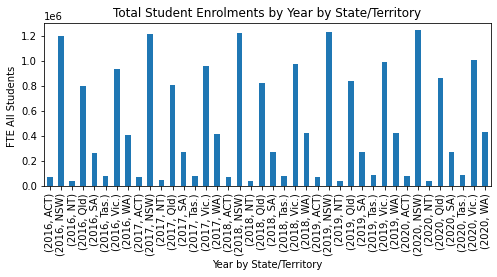

In [221]:
#Display the result in a Bar graph
bar_plot = total_Enrtmnts_by_Year_State.plot (kind = "bar", figsize=(8,3))
plt.title('Total Student Enrolments by Year by State/Territory')
plt.xlabel('Year by State/Territory')
plt.ylabel('FTE All Students ')
plt.show()

In [ ]:
#**********************************02) Percentage of enrolment by state in a pie chart- bar graph*********************


In [ ]:
# Calculate the enrolement percentage by state for last five years
#Enrolment_percentage=(state_enrolments/Total enrolements) * 100


In [215]:
# Calculate the toatl enrolemnts for all states for last five years
Total_enrolements=round(Last_five_years_data_df['FTE All Students '].sum(),1)
Total_enrolements

19460817.1

In [237]:
Enrolment_percentage=round((total_Enrolments_by_State/Total_enrolements)*100,1)
Enrolment_percentage
Enrolment_percentage.reset_index()

,State/Territory,FTE All Students
0,ACT,1.8
1,NSW,31.3
2,NT,1.1
3,Qld,21.1
4,SA,6.9
5,Tas.,2.1
6,Vic.,24.9
7,WA,10.7


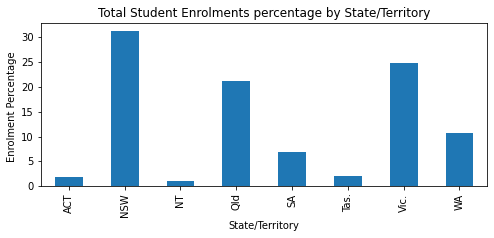

In [220]:
#Result shows in a bar graph
bar_plot = Enrolment_percentage.plot (kind = "bar", figsize=(8,3))
plt.title('Total Student Enrolments percentage by State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('Enrolment Percentage ')
plt.show()

Text(0.5, 1.0, 'Distribution of Enrolenets in each state for last 5 years')

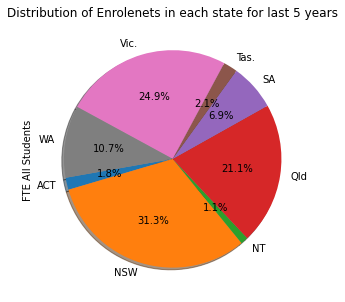

In [238]:
#Result shows in a bar graph
#show pie plot
Enrolment_percentage.plot(kind="pie",y="State/Territory",autopct="%1.1f%%",startangle=190,shadow=True,figsize=(5, 5))

plt.title("Distribution of Enrolenets in each state for last 5 years")


In [239]:
#check the state names
unique_states=Last_five_years_data_df["State/Territory"].unique()
unique_states

array(['NSW', 'Vic.', 'Qld', 'SA', 'WA', 'Tas.', 'NT', 'ACT'],
      dtype=object)

In [240]:
unique_states=Last_five_years_data_df["State/Territory"].unique()
unique_states

array(['NSW', 'Vic.', 'Qld', 'SA', 'WA', 'Tas.', 'NT', 'ACT'],
      dtype=object)

(-1.1258292918388204, 1.10705769644561, -1.12973022947848, 1.1088544564524023)

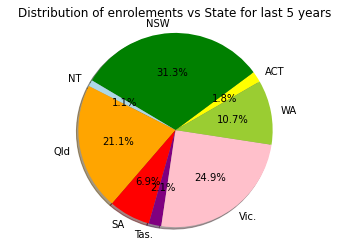

In [244]:
# Generate a pie plot showing the distribution of enrolement percentage versus state using pyplot
labels = ["ACT","NSW","NT","Qld","SA","Tas.","Vic.","WA"]
sizes = [354313.8,6094245.4,204403,4115583.8,1343161.1,405733.5,4851464.7,2091911.8]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen"]
explode = (0,0,0,0,0,0,0,0)

plt.pie(sizes,explode=explode,labels = labels, colors = colors,
       autopct = "%1.1f%%", shadow=True, startangle=750)

plt.title("Distribution of enrolements vs State for last 5 years")

plt.axis("equal")